In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix} -c conda-forge shapely

In [44]:
import random

from shapely.ops import split
from shapely.geometry.linestring import LineString
from shapely.geometry.multipolygon import MultiPolygon
from shapely.wkt import loads
from matplotlib import pyplot as plt

In [45]:
linea = LineString(([1, 0], [1, 1], [1, 2]))
lineb = LineString(([0, 1], [1, 1], [2, 1]))

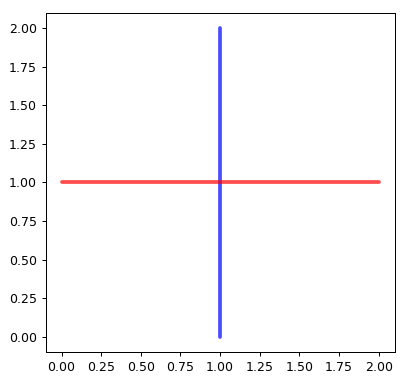

In [23]:
fig =  plt.figure(1, figsize=(5, 5), dpi=90)
ax = fig.add_subplot(111)

x, y = linea.xy
ax.plot(x, y, color='blue', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)

x, y = lineb.xy
ax.plot(x, y, color='red', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)

In [14]:
split_a = split(linea, lineb)
split_b = split(lineb, linea)

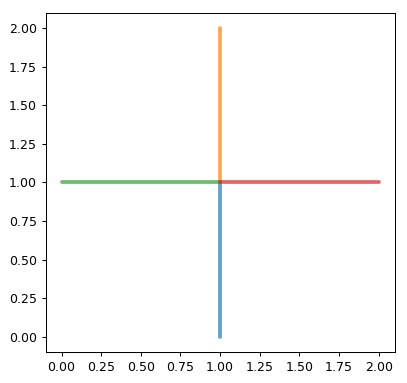

In [37]:
fig =  plt.figure(1, figsize=(5, 5), dpi=90)
ax = fig.add_subplot(111)
for geom in split_a:
    x, y = geom.xy
    ax.plot(x, y, alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
for geom in split_b:
    x, y = geom.xy
    ax.plot(x, y, alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)

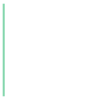

In [38]:
split_a[0]

In [63]:
polygon = loads("""MultiPolygon (((147208.817200000397861 4104178.12759999930858612, 147223.2002999996766448 4104585.44189999997615814, 147236.12490000016987324 4104991.59710000082850456, 147643.1889000004157424 4104985.12189999967813492, 148053.67190000042319298 4104978.61339999921619892, 148464.15579999983310699 4104972.12160000018775463, 148874.6380000002682209 4104965.65289999917149544, 148845.73959999997168779 4104561.95270000025629997, 148828.27599999960511923 4104147.1181000005453825, 148810.81560000032186508 4103732.38550000078976154, 148793.35659999959170818 4103317.65000000037252903, 148388.97589999996125698 4103343.62549999915063381, 147984.59300000034272671 4103369.62069999985396862, 147580.31180000025779009 4103395.63089999929070473, 147181.94269999954849482 4103363.23240000009536743, 147194.43580000009387732 4103770.81039999984204769, 147208.817200000397861 4104178.12759999930858612)))""")

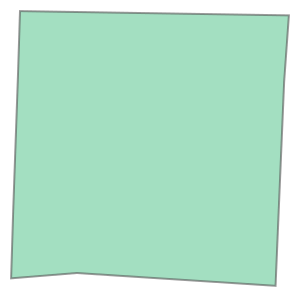

In [71]:
polygon

In [80]:
from shapely.geometry.polygon import orient
from shapely.ops import unary_union

from quarterquarter.line_ops import classify_lines
from quarterquarter.polygon_ops import split_to_lines

from quarterquarter import quarter

In [82]:
if polygon.type == 'MultiPolygon':
    polygon = unary_union(polygon)

In [88]:
polygon = orient(polygon, sign=-1.0)  # set orientation to clockwise

lines = split_to_lines(polygon)
labeled_lines = classify_lines(lines)


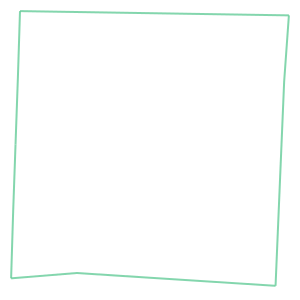

In [89]:
lines

In [90]:
labeled_lines

[LabeledLine(label='W', line=<shapely.geometry.linestring.LineString object at 0x00000210ECD96710>),
 LabeledLine(label='N', line=<shapely.geometry.linestring.LineString object at 0x00000210ECD96908>),
 LabeledLine(label='E', line=<shapely.geometry.linestring.LineString object at 0x00000210ECD96FD0>),
 LabeledLine(label='S', line=<shapely.geometry.linestring.LineString object at 0x00000210ECD96A20>),
 LabeledLine(label='W', line=<shapely.geometry.linestring.LineString object at 0x00000210ECD969E8>)]

In [92]:
quarters = quarter(polygon)

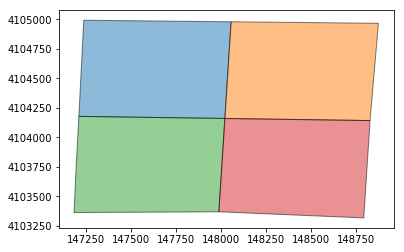

In [97]:
fig, axs = plt.subplots()
for geom in [q.polygon for q in quarters]:
    x, y = geom.exterior.xy
    axs.fill(x, y, alpha=0.5, edgecolor='black')